#### Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/Users/anoguera/anaconda3/envs/MLTrading/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


#### Data Extraction

In [2]:
# Data extraction
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "SPY"
df = yf.download(symbol, start=start_date, end=end_date)
df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,197.952896,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,199.130539,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,198.972290,78379000


#### Feature Adjustments

In [13]:
# Add Moving Averages
df["MA_12"] = df["Adj Close"].rolling(window=12).mean()
df["MA_21"] = df["Adj Close"].rolling(window=21).mean()
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
df["Signal"] = df["Signal"].shift(1)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-02-02,227.619995,228.100006,226.820007,227.770004,200.176392,69657600,NaN,NaN,NaN,0.000659,0.011170,0.011232,0.005258,0.005258,0.005272
2017-02-03,228.820007,229.550003,228.460007,229.339996,201.556137,80563200,NaN,NaN,NaN,0.006869,0.018039,0.018203,0.000218,0.005477,0.005492
2017-02-06,228.869995,229.330002,228.539993,228.929993,201.195801,57790100,NaN,NaN,1.0,-0.001789,0.016249,0.016382,0.002226,0.007702,0.007732


In [4]:
# Add Returns
df["lrets_bench"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,197.952896,91366500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,199.130539,78744400,NaN,NaN,NaN,0.005931,0.005931,0.005949
2017-01-05,226.270004,226.580002,225.479996,226.399994,198.972290,78379000,NaN,NaN,NaN,-0.000795,0.005136,0.005150


In [5]:
# Add Strategy Returns
df["lrets_strat"] = np.log(df["Open"].shift(-1) / df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_strat"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-26,398.670013,407.040009,398.450012,405.309998,390.407379,82168300,382.054601,389.044684,0.0,0.019784,0.679162,0.972224,0.0,0.211001,0.234914
2022-05-27,407.910004,415.380005,407.700012,415.260010,399.991547,84768700,383.861460,388.469036,0.0,0.024253,0.703414,1.020640,0.0,0.211001,0.234914
2022-05-31,413.549988,416.459991,410.029999,412.929993,397.747284,95937000,385.514208,388.511695,0.0,-0.005627,0.697788,1.009303,NaN,NaN,NaN


In [6]:
# Remove NaN's
df.dropna(inplace=True)

In [7]:
# Review DataFrame
print("DF Length: ", len(df))
df.head()

DF Length:  1340


,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-02-02,227.619995,228.100006,226.820007,227.770004,200.176392,69657600,200.048194,199.689216,1.0,0.000659,0.011170,0.011232,0.005258,0.005258,0.005272
2017-02-03,228.820007,229.550003,228.460007,229.339996,201.556137,80563200,200.237879,199.804721,1.0,0.006869,0.018039,0.018203,0.000218,0.005477,0.005492
2017-02-06,228.869995,229.330002,228.539993,228.929993,201.195801,57790100,200.459056,199.910602,1.0,-0.001789,0.016249,0.016382,0.002226,0.007702,0.007732
2017-02-07,229.380005,229.660004,228.720001,228.940002,201.204620,57931200,200.620182,199.983003,1.0,0.000044,0.016293,0.016427,-0.001920,0.005782,0.005799
2017-02-08,228.940002,229.389999,228.309998,229.240005,201.468292,51566200,200.846485,200.099349,1.0,0.001310,0.017603,0.017759,0.001310,0.007092,0.007117


#### Plot Results

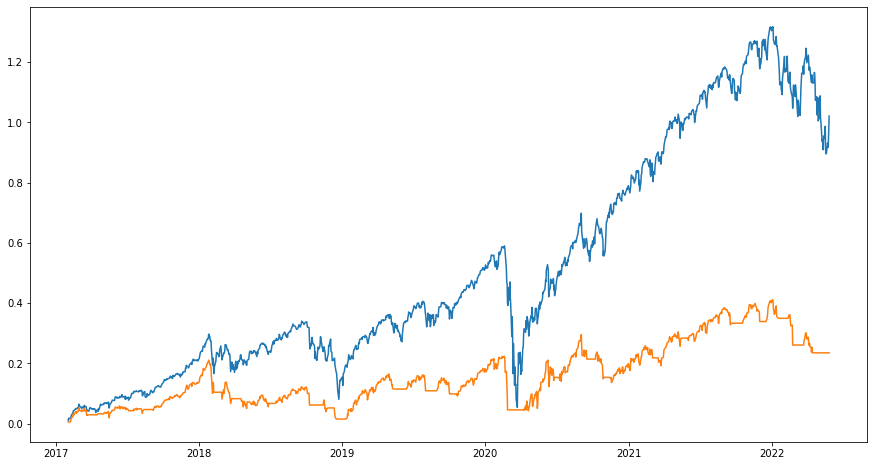

In [8]:
# Show Graph
fig = plt.figure(figsize=(15, 8))
plt.plot(df["prod_bench"])
plt.plot(df["prod_strat"])
plt.show()

#### Metrics

In [14]:
# Calculate Returns
print("Benchmark Returns: ", round(df["prod_bench"].iloc[-1] * 100, 2), "%")
print("Strategy Returns: ", round(df["prod_strat"].iloc[-1] * 100, 2), "%")

Benchmark Returns:  102.06 %
Strategy Returns:  23.49 %


In [18]:
# Calculate Sharpe
def calculate_sharpe(returns):
    N = 255
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe = round((mean - rf) / sigma * 100, 2)
    return sharpe 

In [19]:
# Show Sharpe
bench_sharpe = calculate_sharpe(df["lrets_bench"].values)
strat_sharpe = calculate_sharpe(df["lrets_strat"].values)
print("Benchmark Sharpe: ", bench_sharpe, "%")
print("Strategy Sharpe: ", strat_sharpe, "%")

Benchmark Sharpe:  61.93 %
Strategy Sharpe:  25.13 %
